# Predicting Survival with Logistic Regression

## With Ages

In [25]:
import os
os.chdir('C:\Users\Lundi\Documents\Programming\Python\Kaggle\Titanic - 2015')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cross_validation as skl_cv
import sklearn.preprocessing as skl_pre
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,7

titanic_data_v5 = pd.read_csv('Data/titanic_data_v5.csv')
titanic_data_v5 = titanic_data_v5.drop(['Unnamed: 0'], axis=1)
titanic_data_v5.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male,Embarked Q,Embarked S
0,1,0,3,22,1,0,7.25,1,0,1


#### Preparing data

In [26]:
X = titanic_data_v5.drop(['PassengerId','Survived'], axis=1)
y = titanic_data_v5['Survived']

scaler = skl_pre.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = skl_cv.train_test_split(X_scaled, y, test_size=0.2)

#### Running Logistic Regression with different regularization

In [27]:
from sklearn.grid_search import GridSearchCV
import sklearn.linear_model as skl_lm

lr_clf = skl_lm.LogisticRegression()

gs_params = [
    {'penalty': ['l1'], 'C': np.logspace(-4,4, num=50)},
    {'penalty': ['l2'], 'C': np.logspace(-4,4, num=50)}
]

gs_lr_clf = GridSearchCV(lr_clf, param_grid = gs_params, cv=10)
gs_lr_clf.fit(X_scaled, y);

Summarizing the grid search results

In [28]:
lr_clf_gs_results = []
for params, mean_score, scores in gs_lr_clf.grid_scores_:
    #print('Score: %0.3f+/-%0.2f %r' % (mean_score, np.std(scores), params))
    lr_clf_gs_results.append([params['penalty'], params['C'], mean_score, np.std(scores)])
lr_clf_gs_results = pd.DataFrame(lr_clf_gs_results, columns=['penalty','C','mean_score','std_score'])
lr_clf_gs_results.head(2)

,penalty,C,mean_score,std_score
0,l1,0.000100,0.616162,0.002837
1,l1,0.000146,0.616162,0.002837


In [29]:
gs_lr_clf.best_score_

0.80471380471380471

In [30]:
gs_lr_clf.best_params_

{'C': 0.39069399370546132, 'penalty': 'l1'}

#### Plotting Logistic Regression Grid Search Results

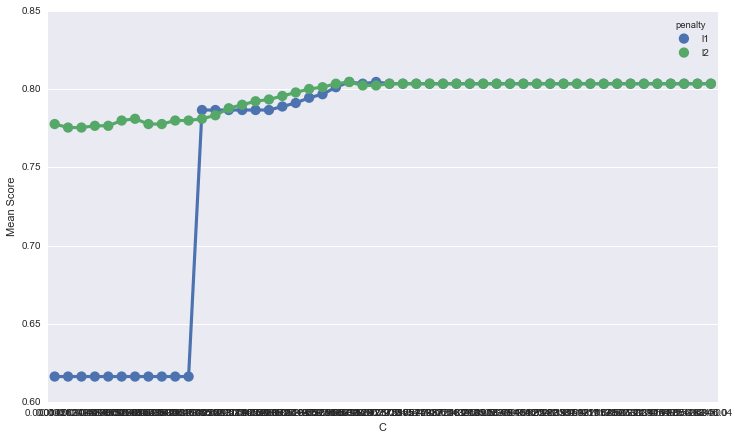

In [20]:
sns.pointplot(x = 'C', y = 'mean_score', hue='penalty', data = lr_clf_gs_results)
ax = plt.gca()
ax.set_xlabel('C')
ax.set_ylabel('Mean Score')

This shows that a high value of C is best for predicting who survived, which means the model works best when given flexibility. 

## Logistic Regression Without Ages

#### Preparing data

In [21]:
X = titanic_data_v5.drop(['PassengerId','Survived','Age'], axis=1)
y = titanic_data_v5['Survived']

scaler = skl_pre.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = skl_cv.train_test_split(X_scaled, y, test_size=0.2)

#### Fitting logistic regression model without ages

In [22]:
lr_clf = skl_lm.LogisticRegression()

gs_params = [
    {'penalty': ['l1'], 'C': np.logspace(-4,4, num=50)},
    {'penalty': ['l2'], 'C': np.logspace(-4,4, num=50)}
]

gs_lr_clf = GridSearchCV(lr_clf, param_grid = gs_params, cv=10)
gs_lr_clf.fit(X_scaled, y);

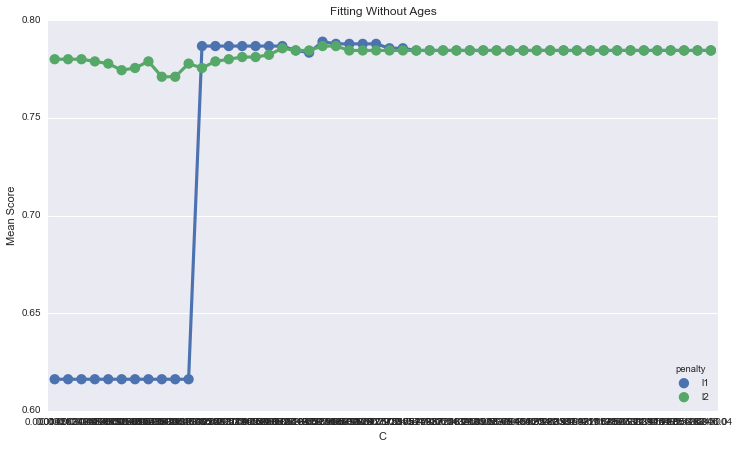

In [23]:
lr_clf_gs_results = []
for params, mean_score, scores in gs_lr_clf.grid_scores_:
    #print('Score: %0.3f+/-%0.2f %r' % (mean_score, np.std(scores), params))
    lr_clf_gs_results.append([params['penalty'], params['C'], mean_score, np.std(scores)])
lr_clf_gs_results = pd.DataFrame(lr_clf_gs_results, columns=['penalty','C','mean_score','std_score'])
lr_clf_gs_results.head(2)

sns.pointplot(x = 'C', y = 'mean_score', hue='penalty', data = lr_clf_gs_results)
ax = plt.gca()
ax.set_xlabel('C')
ax.set_ylabel('Mean Score')
ax.set_title('Fitting Without Ages')

This shows that there is a section where using l1 penalty and a certain value of C was better than l2. Let's get that model:

In [24]:
gs_lr_clf.best_score_

0.78900112233445563

#### Conclusion: The best score without using ages does not exceed the best score using ages, so let's keep the ages in the mix